In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = pd.read_csv('housing (4).csv')

In [3]:
print(df.head())

# Verificar valores nulos
print(df.isnull().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housing_median_age     

In [4]:
# Imputar valores nulos com a mediana
imputer = SimpleImputer(strategy='median')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

# Codificar a variável categórica
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Dividir em features e target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Base de dados está pronta para uso no scikit-learn!")

Base de dados está pronta para uso no scikit-learn!


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

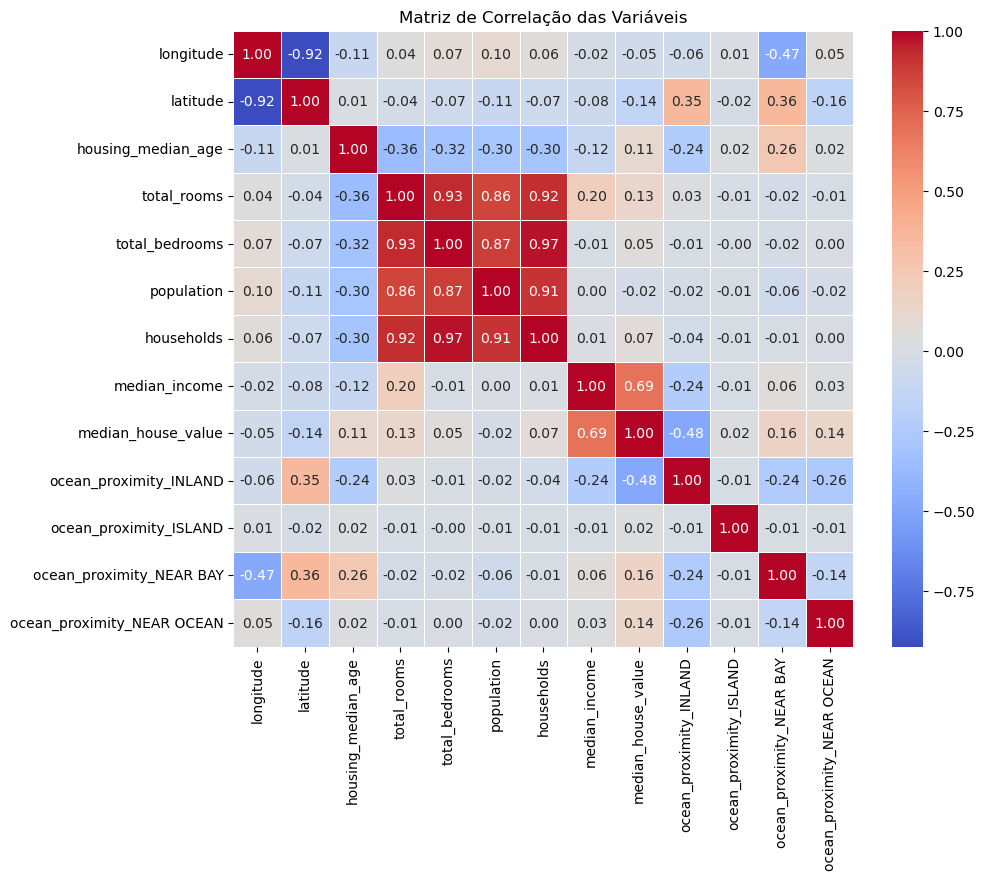

Variáveis mais correlacionadas com o preço das casas:
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [5]:
correlation_matrix = df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

# Identificar as variáveis mais correlacionadas com o preço das casas (median_house_value)
correlation_target = correlation_matrix["median_house_value"].sort_values(ascending=False)
print("Variáveis mais correlacionadas com o preço das casas:")
print(correlation_target)

### 3. Separe os dados em validação e teste

In [6]:
# Definir as variáveis preditoras (X) e a variável alvo (y)
X = df.drop(columns=['median_house_value'])  # Remove a variável alvo
y = df['median_house_value']  # Define a variável alvo

# Dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (16512, 12)
Tamanho do conjunto de teste: (4128, 12)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [7]:
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

print(f"Score da árvore (max_depth=8) no treino: {tree_depth_8.score(X_train, y_train):.4f}")
print(f"Score da árvore (max_depth=8) no teste: {tree_depth_8.score(X_test, y_test):.4f}")
print(f"Score da árvore (max_depth=2) no treino: {tree_depth_2.score(X_train, y_train):.4f}")
print(f"Score da árvore (max_depth=2) no teste: {tree_depth_2.score(X_test, y_test):.4f}")

Score da árvore (max_depth=8) no treino: 0.7565
Score da árvore (max_depth=8) no teste: 0.6989
Score da árvore (max_depth=2) no treino: 0.4980
Score da árvore (max_depth=2) no teste: 0.4739


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
# Fazer previsões com ambas as árvores
y_pred_train_8 = tree_depth_8.predict(X_train)
y_pred_test_8 = tree_depth_8.predict(X_test)

y_pred_train_2 = tree_depth_2.predict(X_train)
y_pred_test_2 = tree_depth_2.predict(X_test)

# Calcular o MSE para cada caso
mse_train_8 = mean_squared_error(y_train, y_pred_train_8)
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)

mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

# Exibir os resultados
print(f"MSE (max_depth=8) - Treino: {mse_train_8:.4f}")
print(f"MSE (max_depth=8) - Teste: {mse_test_8:.4f}")
print(f"MSE (max_depth=2) - Treino: {mse_train_2:.4f}")
print(f"MSE (max_depth=2) - Teste: {mse_test_2:.4f}")

MSE (max_depth=8) - Treino: 3255361754.4229
MSE (max_depth=8) - Teste: 3946099051.6432
MSE (max_depth=2) - Treino: 6710572662.3396
MSE (max_depth=2) - Teste: 6893607949.7017


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada

A árvore com profundidade 8 tem um MSE bem menor nos dados de treinamento, indicando que ela aprendeu muito bem o padrão dos dados de treino.
No entanto, o MSE da árvore 8 nos dados de teste é significativamente maior que no treinamento. Isso sugere overfitting, ou seja, a árvore está muito especializada nos dados de treino e não generaliza bem para novos dados.
Já a árvore com profundidade 2 tem um erro maior no treino, mas a diferença entre treino e teste não é tão grande, o que indica um modelo com menos overfitting.
A escolha da melhor árvore depende do objetivo. Se o foco for generalização, a árvore de profundidade 2 parece mais adequada, pois sofre menos com overfitting. Porém, se você puder ajustar hiperparâmetros (exemplo: limitar profundidade, podar a árvore, ou testar profundidades intermediárias), talvez encontre um modelo com melhor equilíbrio entre viés e variância

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

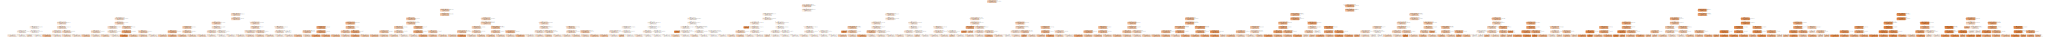

In [13]:
dot_data = export_graphviz(
    tree_depth_8, 
    out_file=None, 
    feature_names=X_train.columns, 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Criando e visualizando o gráfico
graph = graphviz.Source(dot_data)
graph